<a href="https://colab.research.google.com/github/BibhuDas123/Data-Science-Projects/blob/master/Chatbots_RASA/Conversational_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Conversational Chatbot for Slack using Rasa and Python -Part 1




## Starting Jupyter Notebook with necessary imports

In [0]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')



# Installations
* Rasa NLU
* Rasa Core
* SpaCy Language Model

In [15]:
import sys
python = sys.executable

# In your environment run:
!{python} -m pip install -U rasa_core==0.9.6 rasa_nlu[spacy];
!{python} -m pip install -U scikit-learn==0.20.0

Requirement already up-to-date: rasa_core==0.9.6 in /usr/local/lib/python3.6/dist-packages (0.9.6)
Requirement already up-to-date: rasa_nlu[spacy] in /usr/local/lib/python3.6/dist-packages (0.15.1)
  Using cached https://files.pythonhosted.org/packages/f9/c8/8db4108aba5e2166cd2ea4eafa1a4b82f89240a1fa85733029cc2358ad1f/scikit_learn-0.19.2-cp36-cp36m-manylinux1_x86_64.whl
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.2 which is incompatible.
ERROR: umap-learn 0.4.2 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.2 which is incompatible.
ERROR: rasa-nlu 0.15.1 has requirement future~=0.17.1, but you'll have future 0.16.0 which is incompatible.
ERROR: rasa-nlu 0.15.1 has requirement scikit-learn~=0.20.2, but you'll have scikit-learn 0.19.2 which is incompatible.
ERROR: rasa-core 0.9.6 has requirement rasa-nlu~=0.12.0, but you'll have rasa-nlu 0.15.1 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement sc

In [16]:
!{python} -m spacy download en_core_web_md

     |████████████████████████████████| 120.9MB 1.1MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.0.0-cp36-none-any.whl size=122523224 sha256=62d19178120b65460520f08ae58f32dd2f0c9ce00c786c00914457cf7b97d7a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-a77gi7a2/wheels/db/5d/d0/ccdad6b01f9695b4a33793158530b3228223ee31463441663d
Successfully built en-core-web-md
  Found existing installation: en-core-web-md 2.2.5
    Uninstalling en-core-web-md-2.2.5:
      Successfully uninstalled en-core-web-md-2.2.5

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')



## Downloading the English Language Model

In [17]:
!{python} -m spacy link en_core_web_md en --force;


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



# Importing the Installations

In [0]:
import rasa_nlu
import rasa_core
import spacy



# 1. Teaching the bot to understand user inputs using Rasa NLU

## Preparing the NLU Training Data

In [19]:
nlu_md = """
## intent:greet
- hey
- hello there
- hi
- hello there
- good morning
- good evening
- moin
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- cu
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later

## intent:mood_affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:mood_deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- feeling like a king
- wonderful
- I am feeling very good
- I am great
- I am amazing
- I am going to save the world
- super
- extremely good
- so so perfect
- so good
- so perfect

## intent:mood_unhappy
- my day was horrible
- I am sad
- I don't feel very well
- I am disappointed
- super sad
- I'm so sad
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not so good
- not very good
- extremly sad
- so saad
- Quite bad - can I get a cute picture of a [bird](group:birds), please?
- Really bad and only [doggo](group:shibes) pics and change that.
- Not good. The only thing that could make me fell better is a picture of a cute [kitten](group:cats).
- so sad. Only the picture of a [puppy](group:shibes) could make it better.
- I am very sad. I need a [cat](group:cats) picture.
- Extremely sad. Only the cute [doggo](group:shibes) pics can make me feel better.
- Bad. Please show me a [bird](group:birds) pic!
- Pretty bad to be honest. Can you show me a [puppy](group:shibes) picture to make me fell better?

## intent: inform
- A [dog](group:shibes)
- [dog](group:shibes)
- [bird](group:birds)
- a [cat](group:cats)
- [cat](group:cats)
- a [bird](group:birds)
- of a [dog](group:shibes)
- of a [cat](group:cats)
- a [bird](group:birds), please
- a [dog](group:shibes), please
"""

%store nlu_md > nlu.md

Writing 'nlu_md' (str) to file 'nlu.md'.


## Defining the NLU Model Configuration

In [20]:
config = """
language: "en"

pipeline:
- name: "nlp_spacy"                   # loads the spacy language model
- name: "tokenizer_spacy"             # splits the sentence into tokens
- name: "ner_crf"                   # uses the pretrained spacy NER model
- name: "intent_featurizer_spacy"     # transform the sentence into a vector representation
- name: "intent_classifier_sklearn"   # uses the vector representation to classify using SVM
- name: "ner_synonyms"                # trains the synonyms
""" 

%store config > config.yml

Writing 'config' (str) to file 'config.yml'.


## Training the NLU Model.

In [21]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("nlu.md")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 85 (7 distinct intents)
	- Found intents: 'inform', 'mood_unhappy', 'mood_deny', 'mood_great', 'greet', 'goodbye', 'mood_affirm'
	- entity examples: 18 (1 distinct entities)
	- found entities: 'group'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'SpacyNLP' to component cache. Key 'SpacyNLP-en'.
INFO:rasa_nlu.model:Starting to train component SpacyNLP
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component SpacyTokenizer
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component CRFEntityExtractor
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component SpacyFeaturizer
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train c

Fitting 2 folds for each of 6 candidates, totalling 12 fits


## Evaluating the NLU model on a random text

In [22]:
# A helper function for prettier output

def pprint(o):   
    print(json.dumps(o, indent=2))
    
pprint(interpreter.parse("I am very sad. Could you send me a cat picture? "))

{
  "intent": {
    "name": "mood_unhappy",
    "confidence": 0.6951593232945862
  },
  "entities": [
    {
      "start": 35,
      "end": 38,
      "value": "cats",
      "entity": "group",
      "confidence": 0.9543162015604525,
      "extractor": "CRFEntityExtractor",
      "processors": [
        "EntitySynonymMapper"
      ]
    }
  ],
  "intent_ranking": [
    {
      "name": "mood_unhappy",
      "confidence": 0.6951593232945862
    },
    {
      "name": "mood_great",
      "confidence": 0.08567227642057774
    },
    {
      "name": "goodbye",
      "confidence": 0.07599831747540019
    },
    {
      "name": "greet",
      "confidence": 0.04990166280672967
    },
    {
      "name": "inform",
      "confidence": 0.03467682521041728
    },
    {
      "name": "mood_affirm",
      "confidence": 0.033478963650630855
    },
    {
      "name": "mood_deny",
      "confidence": 0.025112631141658227
    }
  ],
  "text": "I am very sad. Could you send me a cat picture? "
}


## Evaluating the NLU model on a test data
(Here we are using the data at hand i.e nlu.md but it isr recommended to use unseen data)

In [23]:
from rasa_nlu.test import run_evaluation

run_evaluation("nlu.md", model_directory)

INFO:rasa_nlu.components:Added 'SpacyNLP' to component cache. Key 'SpacyNLP-en'.
INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 85 (7 distinct intents)
	- Found intents: 'inform', 'mood_unhappy', 'mood_deny', 'mood_great', 'greet', 'goodbye', 'mood_affirm'
	- entity examples: 18 (1 distinct entities)
	- found entities: 'group'

INFO:rasa_nlu.test:Running model for predictions:
100%|██████████| 85/85 [00:00<00:00, 131.17it/s]
INFO:rasa_nlu.test:Intent evaluation results:
INFO:rasa_nlu.test:Intent Evaluation: Only considering those 85 examples that have a defined intent out of 85 examples
INFO:rasa_nlu.test:F1-Score:  0.9881730469965763
INFO:rasa_nlu.test:Precision: 0.9890756302521008
INFO:rasa_nlu.test:Accuracy:  0.9882352941176471
INFO:rasa_nlu.test:Classification report: 
              precision    recall  f1-score   support

     goodbye       1.00      0.91      0.95        

{'entity_evaluation': {'CRFEntityExtractor': {'accuracy': 1.0,
   'f1_score': 1.0,
   'precision': 1.0,
   'report': '              precision    recall  f1-score   support\n\n       group       1.00      1.00      1.00        18\n   no_entity       1.00      1.00      1.00       265\n\n   micro avg       1.00      1.00      1.00       283\n   macro avg       1.00      1.00      1.00       283\nweighted avg       1.00      1.00      1.00       283\n'}},
 'intent_evaluation': {'accuracy': 0.9882352941176471,
  'f1_score': 0.9881730469965763,
  'precision': 0.9890756302521008,
  'predictions': [{'confidence': 0.5903857156680924,
    'intent': 'greet',
    'predicted': 'greet',
    'text': 'hey'},
   {'confidence': 0.48981475526213447,
    'intent': 'greet',
    'predicted': 'greet',
    'text': 'hello there'},
   {'confidence': 0.6099262392791447,
    'intent': 'greet',
    'predicted': 'greet',
    'text': 'hi'},
   {'confidence': 0.48981475526213447,
    'intent': 'greet',
    'predicte

# 2. Teaching the bot to respond using Rasa Core

## 1. Writing  Stories

In [24]:
stories_md = """
## happy path               <!-- name of the story - just for debugging -->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_goodbye
  
## sad path 1               <!-- this is already the start of the next story -->
* greet
  - utter_greet             <!-- action the bot should execute -->
* mood_unhappy
  - utter_ask_picture
* inform{"animal":"dog"}  
  - action_retrieve_image
  - utter_did_that_help
* mood_affirm
  - utter_happy

## sad path 2
* greet
  - utter_greet
* mood_unhappy
  - utter_ask_picture
* inform{"group":"cat"}
  - action_retrieve_image
  - utter_did_that_help
* mood_deny
  - utter_goodbye
  
## sad path 3
* greet
  - utter_greet
* mood_unhappy{"group":"puppy"}
  - action_retrieve_image
  - utter_did_that_help
* mood_affirm
  - utter_happy
  
## strange user
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_unclear

## say goodbye
* goodbye
  - utter_goodbye

## fallback
- utter_unclear

"""

%store stories_md > stories.md

Writing 'stories_md' (str) to file 'stories.md'.


## 2. Defining a Domain

In [25]:
domain_yml = """
intents:
- greet
- goodbye
- mood_affirm
- mood_deny
- mood_great
- mood_unhappy
- inform

slots:
  group:
    type: text
    
entities:
- group

actions:
- utter_greet
- utter_did_that_help
- utter_happy
- utter_goodbye
- utter_unclear
- utter_ask_picture
- __main__.ApiAction

templates:
  utter_greet:
  - text: "Hey! How are you?"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_unclear:
  - text: "I am not sure what you are aiming for."
  
  utter_happy:
  - text: "Great carry on!"

  utter_goodbye:
  - text: "Bye"
  
  utter_ask_picture:
  - text: "To cheer you up, I can show you a cute picture of a dog, cat or a bird. Which one do you choose?"
"""

%store domain_yml > domain.yml

Writing 'domain_yml' (str) to file 'domain.yml'.


## Custom Actions

In [0]:
from rasa_core.actions import Action
from rasa_core.events import SlotSet
from IPython.core.display import Image, display

import requests

class ApiAction(Action):
    def name(self):
        return "action_retrieve_image"

    def run(self, dispatcher, tracker, domain):
        
        group = tracker.get_slot('group')
        
        r = requests.get('http://shibe.online/api/{}?count=1&urls=true&httpsUrls=true'.format(group))
        response = r.content.decode()
        response = response.replace('["',"")
        response = response.replace('"]',"")
   
        
        #display(Image(response[0], height=550, width=520))
        dispatcher.utter_message("Here is something to cheer you up: {}".format(response))

##  Visualising the Training Data

In [28]:

!apt-get -qq install -y graphviz libgraphviz-dev pkg-config;
!breq install graphviz

!{python} -m pip install pygraphviz;
!{python} -m pip install networkx==2.3
!{python} -m pip install keras==2.1.5




Selecting previously unselected package libxdot4.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../libxdot4_2.40.1-2_amd64.deb ...
Unpacking libxdot4 (2.40.1-2) ...
Selecting previously unselected package libgvc6-plugins-gtk.
Preparing to unpack .../libgvc6-plugins-gtk_2.40.1-2_amd64.deb ...
Unpacking libgvc6-plugins-gtk (2.40.1-2) ...
Selecting previously unselected package libgraphviz-dev.
Preparing to unpack .../libgraphviz-dev_2.40.1-2_amd64.deb ...
Unpacking libgraphviz-dev (2.40.1-2) ...
Setting up libxdot4 (2.40.1-2) ...
Setting up libgvc6-plugins-gtk (2.40.1-2) ...
Setting up libgraphviz-dev (2.40.1-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

/bin/bash: breq: command not found
     |████████████████████████████████| 122kB 11.7MB/s 
  Created wheel for 

INFO:apscheduler.scheduler:Scheduler started
Processed Story Blocks: 100%|██████████| 7/7 [00:00<00:00, 433.11it/s, # trackers=1]


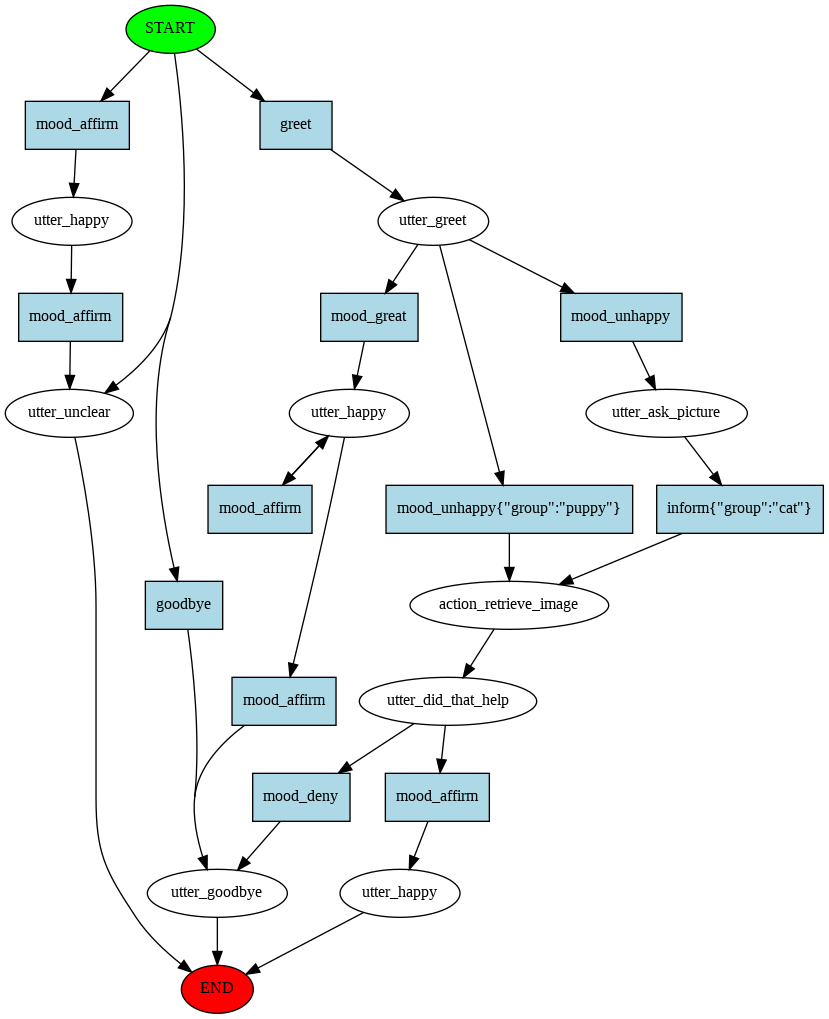

In [29]:
from IPython.display import Image
from rasa_core.agent import Agent

agent = Agent('domain.yml')
agent.visualize("stories.md", "story_graph.png", max_history=2)
Image(filename="story_graph.png")

## Training a Dialogue Model

In [30]:
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

# this will catch predictions the model isn't very certain about
# there is a threshold for the NLU predictions as well as the action predictions
fallback = FallbackPolicy(fallback_action_name="utter_unclear",
                          core_threshold=0.2,
                          nlu_threshold=0.1)

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy(), fallback])

# loading our neatly defined training dialogues
training_data = agent.load_data('stories.md')

agent.train(
    training_data,
    validation_split=0.0,
    epochs=200
)

agent.persist('models/dialogue')

Using TensorFlow backend.
Processed Story Blocks: 100%|██████████| 7/7 [00:00<00:00, 220.59it/s, # trackers=14]
INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers: 100%|██████████| 263/263 [00:03<00:00, 71.48it/s, # actions=333]
INFO:rasa_core.featurizers:Created 333 action examples.
Processed actions: 333it [00:00, 1292.47it/s, # examples=333]
INFO:rasa_core.policies.memoization:Memorized 333 unique action examples.
INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers: 100%|██████████| 263/263 [00:04<00:00, 57.54it/s, # actions=333]
INFO:rasa_core.featurizers:Created 333 action examples.
INFO:rasa_core.policies.keras_policy:Fitting model with 333 total samples and a validation split of 0.0


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 5, 18)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                6528      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 297       
_________________________________________________________________
activation_1 (Activation)    (None, 9)                 0         
Total params: 6,825
Trainable params: 6,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
333/333 [==============================] - 1s 3ms/step - loss: 2.0805 - acc: 0.3694
Epoch 2/200
333/333 [==============================] - 0s 270us/step - loss: 1.9750 - acc: 0.4324
Epoch 3/200
333/333 [==============================] - 0s 283us/step - loss: 1

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Persisted model to '/content/models/dialogue'


# Talk to your Bot

In [31]:
#Starting the Bot

from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)

INFO:rasa_nlu.components:Added 'SpacyNLP' to component cache. Key 'SpacyNLP-en'.


In [0]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print(response["text"])
        

Your bot is ready to talk! Type your messages here or send 'stop'
Hello how are you
Bye
Great
Great carry on!
i am unhappy
Bye
Hey! How are you?
Bye
To cheer you up, I can show you a cute picture of a dog, cat or a bird. Which one do you choose?
Here is something to cheer you up: https://cdn.shibe.online/birds/58939a148c5205c12273e076c64c0cd1c3122d75.jpg
Did that help you?
Hello
Hey! How are you?
- indeed
Great carry on!
